# Regression on *Growth in a Time of Debt* data article from Reinhart and Rogoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

## Load data

In [2]:
data = pd.read_excel('ReinhartRogoff.xlsx', usecols=[0,1,2,3], names=['Country', 'Year', 'Debt to GDP', 'Growth rate'])
data.head()

,Country,Year,Debt to GDP,Growth rate
0,Australia,1946,190.419080,-3.557951
1,Australia,1947,177.321371,2.459475
2,Australia,1948,148.929811,6.437534
3,Australia,1949,125.828699,6.611994
4,Australia,1950,109.809398,6.920201


In [3]:
data.describe()

,Year,Debt to GDP,Growth rate
count,1175.000000,1175.000000,1175.000000
mean,1979.254468,46.320173,3.413757
std,17.993206,32.346159,2.992940
min,1946.000000,3.279110,-10.942159
25%,1964.000000,22.199082,1.904000
50%,1980.000000,40.503248,3.283427
75%,1995.000000,61.473961,5.099766
max,2009.000000,247.481942,27.329193


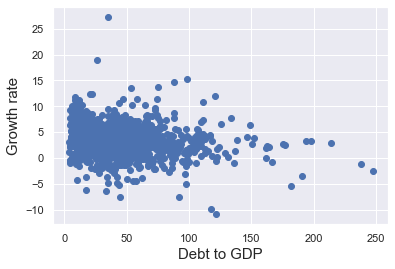

In [4]:
plt.scatter(data['Debt to GDP'], data['Growth rate'], color='C0')
plt.xlabel('Debt to GDP', fontsize=15)
plt.ylabel('Growth rate', fontsize=15)
plt.show()

## StatsModels

In [5]:
y = data['Growth rate']
x1 = data['Debt to GDP']

x = sm.add_constant(x1)
model = sm.OLS(y, x)
results = model.fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth rate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.72e-12
Time:                        10:10:55   Log-Likelihood:                -2930.9
No. Observations:                1175   AIC:                             5866.
Df Residuals:                    1173   BIC:                             5876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2704      0.150     28.558      0.000       3.977       4.564
Debt to GDP    -0.0185      0.003     -6.986      0.000      -0.024      -0.013
==============================================================================
Omnibus:                      200.078   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1607.518
Skew:                           0.538   Prob(JB):                         0.00
Kurtosis:                       8.628   Cond. No.                         98.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y_hat = x1 * results.params[1] + results.params[0]

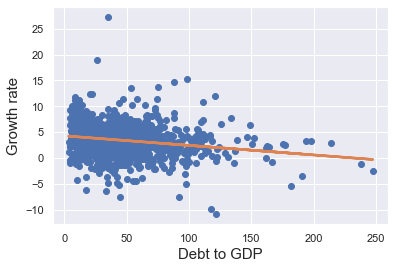

In [8]:
plt.scatter(data['Debt to GDP'], data['Growth rate'], color='C0')
plt.plot(x1, y_hat, lw=2.5, color='C1')
plt.xlabel('Debt to GDP', fontsize=15)
plt.ylabel('Growth rate', fontsize=15)
plt.show()

In [9]:
new_data = pd.DataFrame(data=[150, 250], columns=['Debt to GDP'])
new_data = sm.add_constant(new_data)

results.predict(new_data)

0    1.496378
1   -0.352949
dtype: float64

## ScikitLearn

In [10]:
y = data['Growth rate']
x = data['Debt to GDP']

In [11]:
reg = LinearRegression()
reg.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [12]:
y_hat = x * reg.coef_ + reg.intercept_

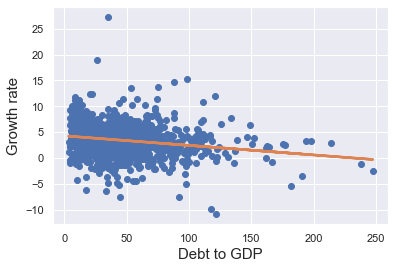

In [13]:
plt.scatter(data['Debt to GDP'], data['Growth rate'], color='C0')
plt.plot(x, y_hat, lw=2.5, color='C1')
plt.xlabel('Debt to GDP', fontsize=15)
plt.ylabel('Growth rate', fontsize=15)
plt.show()

In [14]:
new_data = pd.DataFrame(data=[150, 250], columns=['Debt to GDP'])

reg.predict(new_data)

array([ 1.49637808, -0.35294862])